In [1]:
import os
import json
import pandas as pd

# Define the base directory containing evaluation results
base_dir = "results/evaluations"

# Initialize an empty list to store all model results
all_results = []

# Iterate through each model type (classical_ml, lstm, mlp, transformer)
for model_type in os.listdir(base_dir):
    model_dir = os.path.join(base_dir, model_type)
    
    # Iterate through each JSON file in the model directory
    for file_name in os.listdir(model_dir):
        if file_name.endswith(".json"):
            file_path = os.path.join(model_dir, file_name)
            
            # Load the JSON data
            with open(file_path, "r") as f:
                data = json.load(f)
            
            # Extract relevant information based on model type
            if model_type == "classical_ml":
                # For classical ML, the JSON file directly contains the classification report
                classification_report = data
                model_name = file_name.replace(".json", "")
                train_time = None  # Not applicable for classical ML
                num_parameters = None  # Not applicable for classical ML
                config = {}  # Not applicable for classical ML
            elif model_type == "transformer":
                # For transformer, the classification report is at the top level
                classification_report = data["classification_report"]
                model_name = data["config"]["model_name"]
                train_time = data.get("execution_time", None)
                num_parameters = data.get("model_size", None)  # Use "model_size" for transformer
                config = data.get("config", {})
            else:
                # For lstm and mlp, the classification report is nested
                classification_report = data[model_type]["classification_report"]
                model_name = data[model_type]["config"]["model_name"]
                train_time = data[model_type].get("execution_time", None)
                num_parameters = data[model_type].get("num_parameters", None)
                config = data[model_type].get("config", {})
            
            # Extract metrics for each language
            for language, metrics in classification_report.items():
                if language in ["accuracy", "macro avg", "weighted avg"]:
                    continue  # Skip these for now, handle them separately
                
                # Ensure metrics is a dictionary
                if not isinstance(metrics, dict):
                    print(f"Skipping invalid metrics for {model_type}/{model_name}/{language}: {metrics}")
                    continue
                
                # Create a dictionary for the current language and model
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": language,
                    "precision": metrics.get("precision", None),
                    "recall": metrics.get("recall", None),
                    "f1_score": metrics.get("f1-score", None),
                    "support": metrics.get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config  # Add config parameters as columns
                }
                
                # Append the result to the list
                all_results.append(result)
            
            # Add macro, weighted, and accuracy metrics (if they exist)
            if "macro avg" in classification_report and isinstance(classification_report["macro avg"], dict):
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "macro_avg",
                    "precision": classification_report["macro avg"].get("precision", None),
                    "recall": classification_report["macro avg"].get("recall", None),
                    "f1_score": classification_report["macro avg"].get("f1-score", None),
                    "support": classification_report["macro avg"].get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                all_results.append(result)
            
            if "weighted avg" in classification_report and isinstance(classification_report["weighted avg"], dict):
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "weighted_avg",
                    "precision": classification_report["weighted avg"].get("precision", None),
                    "recall": classification_report["weighted avg"].get("recall", None),
                    "f1_score": classification_report["weighted avg"].get("f1-score", None),
                    "support": classification_report["weighted avg"].get("support", None),
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                all_results.append(result)
            
            if "accuracy" in classification_report:
                result = {
                    "model_type": model_type,
                    "model_name": model_name,
                    "language": "accuracy",
                    "precision": None,
                    "recall": None,
                    "f1_score": None,
                    "support": None,
                    "train_time": train_time,
                    "num_parameters": num_parameters,
                    **config
                }
                result["accuracy"] = classification_report.get("accuracy", None)
                all_results.append(result)

# Convert the list of results into a DataFrame
df = pd.DataFrame(all_results)

# Reorder columns for better readability
columns = [
    "model_type", "model_name", "language", "precision", "recall", "f1_score", "support", "accuracy",
    "train_time", "num_parameters", "embedding_dim", "hidden_dim", "n_layers", "bidirectional",
    "dropout", "lr", "n_epochs", "patience", "min_delta", "batch_size"
]
df = df[columns]

# Display the DataFrame
df

Skipping invalid metrics for classical_ml/svm_tfidf_feature_importance/top_features: [['ı', 0.4231782987015388], ['aa', 0.3932107611461239], [' ', 0.39171386096884847], ['é', 0.36371791078651033], ['，', 0.34099740006021206], ['ä', 0.33135934120473265], ['o ', 0.3221478503530446], ['ă', 0.31801519836385733], ['o', 0.3155157913261962], ['u', 0.3130643120319707], ['k', 0.31294460288856435], [' d', 0.31010988024476355], ['e ', 0.3063902828628507], ['i', 0.3027190438660906], ['n ', 0.3008210692775386], ['ae', 0.2963801121033525], ['m ', 0.2951157157680497], ['en ', 0.295092785054714], ['t ', 0.29265263358602356], ['i ', 0.2899750480136756]]
Skipping invalid metrics for classical_ml/svm_tfidf_feature_importance/model_type: LinearSVC
Skipping invalid metrics for classical_ml/svm_unigram_feature_importance/top_features: [['õ', 0.4668630613863425], ['ã', 0.3759059811797853], ['ă', 0.28368601162168594], ['ú', 0.2549355663117019], ['—', 0.25233816361089156], ['å', 0.2520919480362557], ['à', 0.231

,model_type,model_name,language,precision,recall,f1_score,support,accuracy,train_time,num_parameters,embedding_dim,hidden_dim,n_layers,bidirectional,dropout,lr,n_epochs,patience,min_delta,batch_size
0,lstm,lstm_language_detector,Arabic,1.000000,0.995000,0.997494,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
1,lstm,lstm_language_detector,Chinese,0.990050,0.995000,0.992519,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
2,lstm,lstm_language_detector,Dutch,0.989899,0.980000,0.984925,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
3,lstm,lstm_language_detector,English,0.798319,0.950000,0.867580,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
4,lstm,lstm_language_detector,Estonian,0.974359,0.950000,0.962025,200.0,NaN,79.300583,4774930.0,300.0,256.0,2.0,True,0.3,0.001,40.0,5.0,1e-4,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,mlp,mlp_language_detector,Turkish,0.915344,0.865000,0.889460,200.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
253,mlp,mlp_language_detector,Urdu,0.918660,0.960000,0.938875,200.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
254,mlp,mlp_language_detector,macro_avg,0.843976,0.836364,0.837327,4400.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0
255,mlp,mlp_language_detector,weighted_avg,0.843976,0.836364,0.837327,4400.0,NaN,20.314758,17571474.0,300.0,NaN,NaN,NaN,0.3,0.001,30.0,5.0,1e-4,64.0


In [7]:
df.index = df['model_name']

<Axes: xlabel='model_name'>

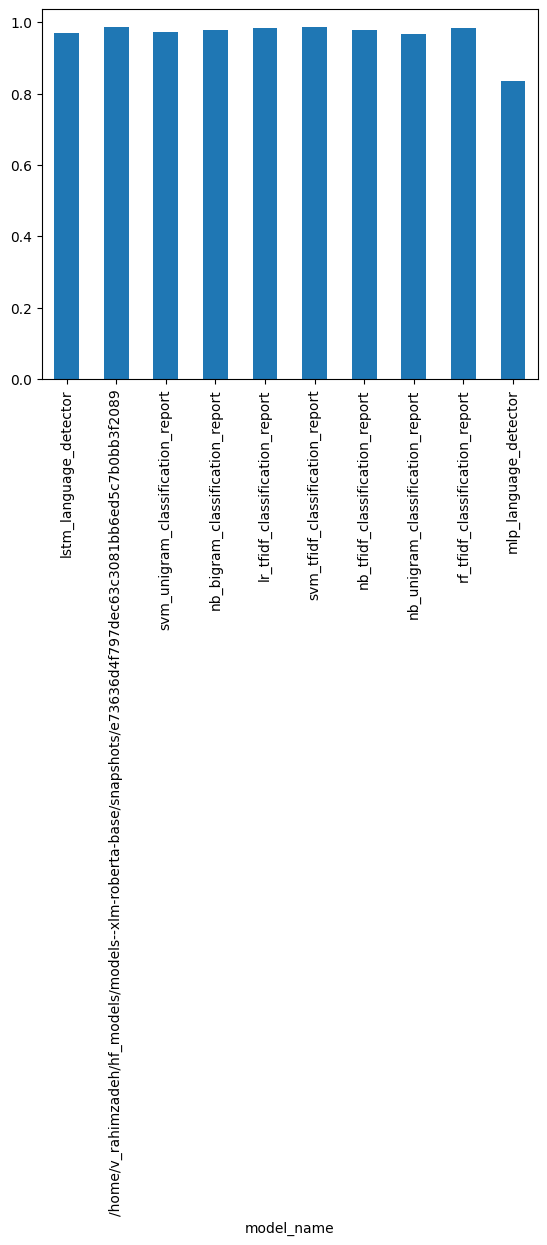

In [8]:
accuracies = df[df['accuracy'].notna()]

accuracies['accuracy'].plot(kind='bar')